## Trade Risk

In [ ]:
#pip install yfinance
#get live exchange rate is the next step 

In [74]:
#App is for people with pounds
print('Currency in use is GBP')
Balance = int(input("Balance:"))
Risk_amount = int(input("Percentage:"))
Stop_Loss = int(input("Stop Loss:" +  "in pips"))
#Stop_loss = input("Stop Loss Price:")

Maxloss = Balance*(Risk_amount/100);






Currency in use is GBP
Balance:1000
Percentage:1
Stop Loss:in pips200


In [75]:
options = ['EURUSD', 'BTCUSD', 'GBPUSD']

user_input = ''

input_message = "Pick an option:\n"

for index, item in enumerate(options):
    input_message += f'{index+1}) {item}\n'

input_message += 'Your choice: '

while user_input not in map(str, range(1, len(options) + 1)):
    user_input = input(input_message)

selected_option = options[int(user_input) - 1]

pip_sizes = {'EURUSD': 0.0001, 'BTCUSD': 0.01, 'GBPUSD': 0.0001}
contract_sizes = {'EURUSD': 100000, 'BTCUSD': 1, 'GBPUSD': 100000}
exchange_rates = {'EURUSD': 1.18, 'BTCUSD': 39000, 'GBPUSD': 1.28756}

pip_size = pip_sizes[selected_option]
contract_size = contract_sizes[selected_option]
exchange_rate = exchange_rates[selected_option]

print('You picked: ' + selected_option)
print('Pip Size:', pip_size)
print('Contract Size:', contract_size)
print('Exchange Rate:', exchange_rate)



Pick an option:
1) EURUSD
2) BTCUSD
3) GBPUSD
Your choice: 1
You picked: EURUSD
Pip Size: 0.0001
Contract Size: 100000
Exchange Rate: 1.18


In [76]:
Pip_Value = (pip_size /exchange_rate) * contract_size ;
lots = Maxloss /(Stop_Loss *Pip_Value) ;

In [77]:
print("risk amount:", Maxloss)
print("Lots: " , lots)

risk amount: 10.0
Lots:  0.005899999999999999


## Beta 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


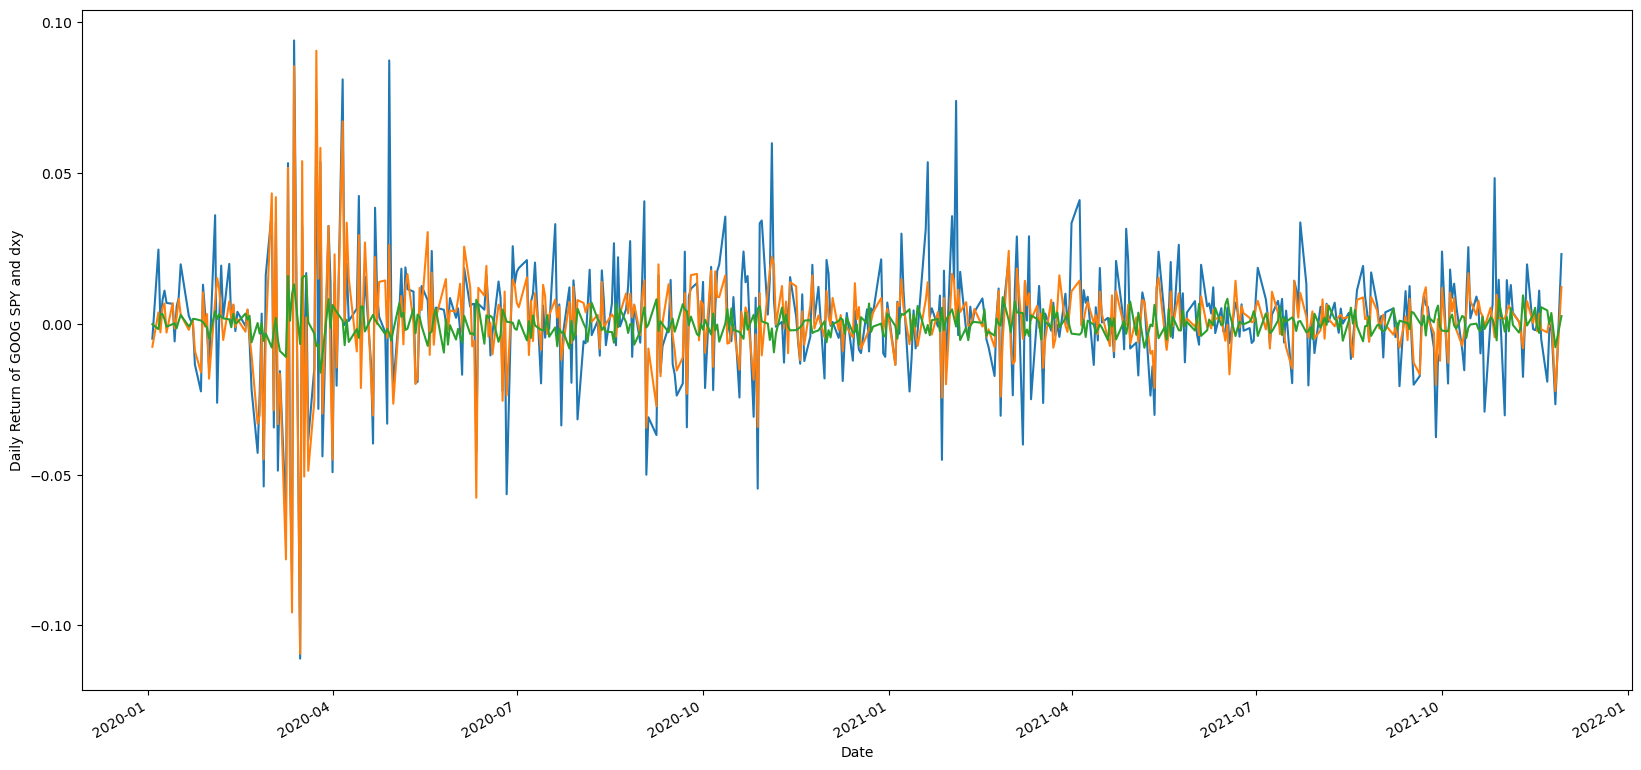

In [108]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# Importing python package pandas datareader to import data from yahoo
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df1 = pdr.get_data_yahoo("GOOG", start="2020-01-01", end="2021-11-30")
df2 = pdr.get_data_yahoo("SPY", start="2020-01-01", end="2021-11-30")
df3 = pdr.get_data_yahoo("DX-Y.NYB", start="2020-01-01", end="2021-11-30")
# We have to take the percent changes to get to returns hence we will use .pct_change()
# We do not want the first (0th) element because it is NAN
return_goog = df1.Close.pct_change()[1:]
return_spy = df2.Close.pct_change()[1:]
return_dxy = df3.Close.pct_change()[1:]

# We will plot the returns of Google and S&P500 against each other
plt.figure(figsize=(20,10))
return_goog.plot()
return_spy.plot()
return_dxy.plot()
plt.ylabel("Daily Return of GOOG SPY and dxy")
plt.show()

In [112]:
#alpha how  much it beats the market
#beta is percent more volatile than the market
# Importing libraries and packages
import statsmodels.api as sm
from statsmodels import regression

# Regression model
X = return_spy.values
Y = return_goog.values
#Z = return_dxy.values
def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()

    # We are removing the constant
    x = x[:, 1]
    return model.params[0], model.params[1]

alpha, beta = linreg(X,Y)
print('alpha: ' + str(alpha))
print('beta: ' + str(beta))

#alpha, beta = linreg(X,Z)
#print('alpha: ' + str(alpha))
#print('beta: ' + str(beta))

alpha: 0.0009037153144392891
beta: 1.0074786772400206


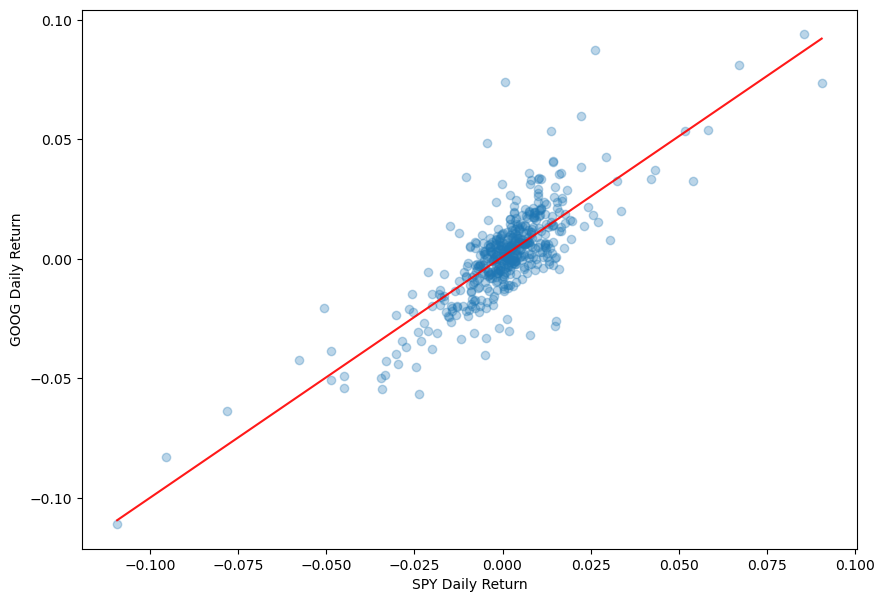

In [90]:
# Plotting
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha
plt.figure(figsize=(10,7))
plt.scatter(X, Y, alpha=0.3) # Plot the raw data
plt.xlabel("SPY Daily Return")
plt.ylabel("GOOG Daily Return")
plt.plot(X2, Y_hat, 'r', alpha=0.9)
plt.show()

## Volatility

## Single asset 


In [91]:
# Import needed libraries

import pandas as pd
import numpy as np
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [92]:
# Specify starting and end periods with Datetime

start = datetime(2016,1,1)
end = datetime(2017,1,1)
# Get Apple's stock info

apple = web.DataReader('AAPL', data_source='yahoo', start=start, end=end)
# Check the data

apple.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.041481,270597600
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.439024,223164000
2016-01-06,25.139999,25.592501,24.967501,25.174999,22.980330,273829600
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.010454,324377600
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.126835,283192000


In [93]:
# Slice the Adjusted Closing prices we need 

aapl_close = apple['Adj Close']
aapl_close.head()

Date
2016-01-04    24.041481
2016-01-05    23.439024
2016-01-06    22.980330
2016-01-07    22.010454
2016-01-08    22.126835
Name: Adj Close, dtype: float64

In [94]:
# Calculate daily returns 

daily_returns = aapl_close.pct_change()
daily_returns.head()

Date
2016-01-04         NaN
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005288
Name: Adj Close, dtype: float64

In [95]:
# Check the volatility of Apple's daily returns

daily_volatility = daily_returns.std()
daily_volatility

0.014731125210655841

1.473%


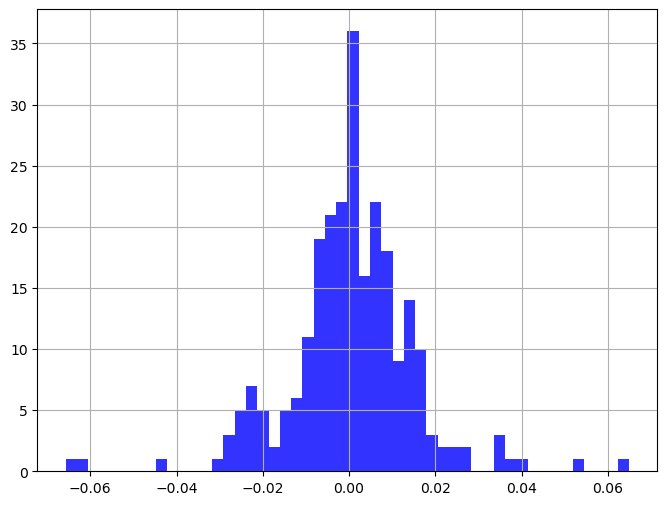

In [96]:
# just making the float a bit human readable ;) 

print(str(round(daily_volatility, 5) * 100) + '%')

daily_returns.hist(bins=50, alpha=0.8, color='blue', figsize=(8,6));

In [98]:
# Let's have fun by comparing the volatility of three stocks. Pull Ajdusted closing prices for Apple, Fb and Tesla

assets = ['AAPL', 'FB', 'TSLA']

df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Adj Close']
    
df.head()

[*********************100%***********************]  1 of 1 completed
Got error from yahoo api for ticker FB, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- FB: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


,AAPL,FB,TSLA
Date,,,
2016-01-04,24.041483,NaN,14.894000
2016-01-05,23.439024,NaN,14.895333
2016-01-06,22.980335,NaN,14.602667
2016-01-07,22.010456,NaN,14.376667
2016-01-08,22.126842,NaN,14.066667


In [99]:
# Check the daily returns of the three companies

asset_returns_daily = df.pct_change()
asset_returns_daily.head()

,AAPL,FB,TSLA
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025059,NaN,0.000090
2016-01-06,-0.019569,NaN,-0.019648
2016-01-07,-0.042205,NaN,-0.015477
2016-01-08,0.005288,NaN,-0.021563


In [100]:
# Check the volatility of the daily returns of the three companines

asset_volatility_daily = asset_returns_daily.std()
asset_volatility_daily

AAPL    0.014731
FB           NaN
TSLA    0.024073
dtype: float64

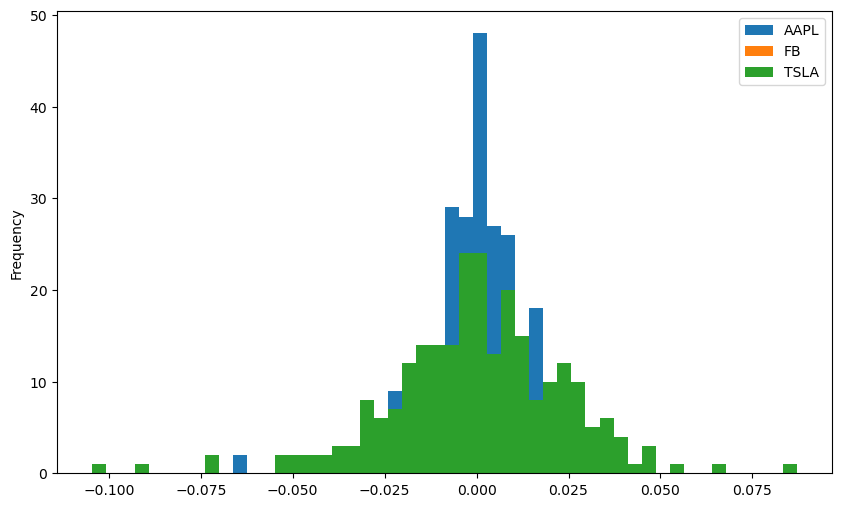

In [101]:
# Visualise the daily returns of the three companies stacked against each other. Notice the most/least volatile?

asset_returns_daily.plot.hist(bins=50, figsize=(10,6));


In [102]:
# As seen in the histogram, Tesla's daily returns are the most volatile with the biggest 'spreads'

asset_volatility_daily.max()

0.024073160887296056

In [103]:
# No surprise Apple's daily returns is the least volatile with such a small spread

asset_volatility_daily.min()

0.01473111012031604

## Portfolio of assets

In [ ]:


#import python's number crunchers and a randomizer

import numpy as np
import pandas as pd
from pandas_datareader import data as web
import random


In [ ]:
# just copied output list from previous scraped list

scraped_tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BCR', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'COH', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DLPH', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LVLT', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'Q', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SPLS', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UA', 'UAA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']


In [ ]:
# checked the number of items in our list
len(scraped_tickers)

In [ ]:
# make a portfolio of randomly 5 listed stocks from the big list

random_selection = random.sample(scraped_tickers, 5)
random_selection

In [ ]:
# pull Adjusted closing prices with Pandas datareader and check the head of this data

data = pd.DataFrame()

for item in random_selection:
    data[item] = web.DataReader(item, data_source='yahoo', start='15-09-2016')['Adj Close']

data.head()
# Pull Adjusted closing prices for the portfolio (consisting of 5 stocks) we want to construct

#assets =  ['AAPL', 'GM', 'GE', 'FB', 'WMT']

#df = pd.DataFrame()

#for stock in assets:
    #df[stock] = web.DataReader(stock, data_source='yahoo',start='2015-1-1' ,end='2017-1-1')['Adj Close']
    
#df.head()

In [ ]:



# simple daily returns with .pct_change() method

daily_simple_returns = data.pct_change()
daily_simple_returns.head()

# Construct a covariance matrix for the portfolio's daily returns with the .cov() method

cov_matrix_d = daily_simple_returns.cov()
cov_matrix_d

# Annualise the daily covariance matrix with the standard 250 trading days

cov_matrix_a = cov_matrix_d * 250
cov_matrix_a
 

In [ ]:
# annualise daily returns. 250 trading days in a year

annual_returns = daily_simple_returns.mean() * 250
annual_returns



In [ ]:

# number of assets in the randomly selected portfolio

num_assets = len(random_selection)
num_assets



In [ ]:
# sum of weights must equal 1. 
# (a / a+b) + (b / a+b) = 1 
# applying this logic above

weights = np.random.random(num_assets)
weights = weights / sum(weights)
weights



In [ ]:
# check if the sum of weights is indeed = 1

sum(weights)



In [ ]:
# calculate expected returns of the portfolio 

port_returns_expected = np.sum(weights * annual_returns)
port_returns_expected



In [ ]:
# convert the float into a percentage cos why not ;)

print(str(round(port_returns_expected * 100, 2)) + '%')

In [ ]:
#if weights to be equal
# Assign equal weights to the five stocks. Weights must = 1 so 0.2 for each 

#weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
#weights

# Calculate the variance with the formula

#port_variance = np.dot(weights.T, np.dot(cov_matrix_a, weights))
#port_variance
# Just converting the variance float into a percentage

#print(str(round(port_variance, 4) * 100) + '%')

# The standard deviation of a portfolio is just a square root of its variance

#port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix_a, weights)))
#port_volatility

#print(str(round(port_volatility, 4) * 100) + '%')

# Proof that Standard deviation of a portfolio is just a square root of its variance

#np.dot(weights.T, np.dot(cov_matrix_a, weights)) ** 0.5

In [ ]:
#VAR for the portfolio

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import timedelta
from datetime import datetime
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from scipy import stats
import seaborn as sns
import yfinance as yf
import math
def getData(portfolio):
    df = pd.DataFrame()
    for stock in portfolio:
        s = yf.Ticker(stock)
        df[stock] = s.history(period='max')["Close"]
    return df
def VaR(portfolio, weights, price, date = datetime.today()):
    '''
    Takes in the list of stocks in your portfolio, 
    '''
    df = getData(portfolio)
    df = df[-501:]
    df_exp =(df)/df.iloc[0]
    df_exp = df_exp*weights*price
    df['Value'] = df_exp.sum(axis = 1)
    df_loss = df.set_index(np.arange(0,501,1))
    for i in range(1,501):
        df_loss.iloc[i-1] = (df.iloc[i]/df.iloc[i-1])*df.iloc[-1]
    df_loss = df_loss[:-1]
    for i in range (500):
        df_loss['Value'].iloc[i]  = round(df_loss["Value"].iloc[i]-df["Value"].iloc[-1] , 2)
    arr = df_loss['Value'].values *-1
    arr = np.sort(arr)
    print("The 1 day 99 percent confidence VaR is: ",'{:2f}'.format(round(arr[4],2)*-1))
    print("The 10 day 99 percent confidence VaR is: ",'{:2f}'.format(round(arr[4],2)*math.sqrt(10)*-1))
portfolio = ['AMZN']
weights = np.array([1])
price = 10000000
VaR(portfolio, weights, price)
The 1 day 99 percent confidence VaR is:  1186213.420000
The 10 day 99 percent confidence VaR is:  3751136.198258
portfolio = ['FB', "AAPL", "AMZN", 'NFLX', 'GOOG']
weights = np.array([0.2,0.2,0.2,0.2,0.2])
start = '2013-01-01'
VaR(portfolio, weights, price)
The 1 day 99 percent confidence VaR is:  888754.780000
The 10 day 99 percent confidence VaR is:  2810489.386162
Value at Risk is the defined as the maximum loss that we are anticipating the N number of days with X% confidence.

Here we can clearly see that if we invest the same amount of money(10 million dollars) in one stock(AMZN), the value at risk is much higher as compared to the diverse portfolio withing FAANG. This is still not the most optimal portfolio. We can optimize the portfolio and that would lead to even lower value at Risk.

Value at Risk is a great indicator of the fact that diversification in portfolio is very important.

 

# Market Risk


### Parametric VAR


In [157]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Portfolio Information
weights = np.array([0.4, 0.3, 0.3])  # Portfolio weights
mean_returns = np.array([0.08, 0.12, 0.15])  # Expected returns of the assets
volatility = np.array([0.1, 0.2, 0.3])  # Volatility (standard deviation) of the assets
cov_matrix = np.array([[0.01, 0.005, 0.002],
                       [0.005, 0.04, 0.01],
                       [0.002, 0.01, 0.09]])  # Covariance matrix of the assets

confidence_level = 0.95  # Confidence level for VaR (e.g., 95%)

# Portfolio Value
portfolio_value = 1000000  # Initial value of the portfolio

# Calculate Portfolio Mean Return
portfolio_mean_return = np.dot(weights, mean_returns)

# Calculate Portfolio Volatility
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Calculate Z-Score (Inverse of the cumulative standard normal distribution)
z_score = norm.ppf(1 - confidence_level)

# Calculate Parametric VaR
parametric_var = portfolio_value * (portfolio_mean_return - z_score * portfolio_volatility)

print(f"Parametric VaR at {confidence_level*100:.2f}% confidence level is: ${parametric_var:.2f}")
#when choosing a portfoli i want to choose to see the normal distributuin of the pair and see the plot with the area shaded

Parametric VaR at 95.00% confidence level is: $326070.46


Parametric VaR at 99.00% confidence level is: $414349.61


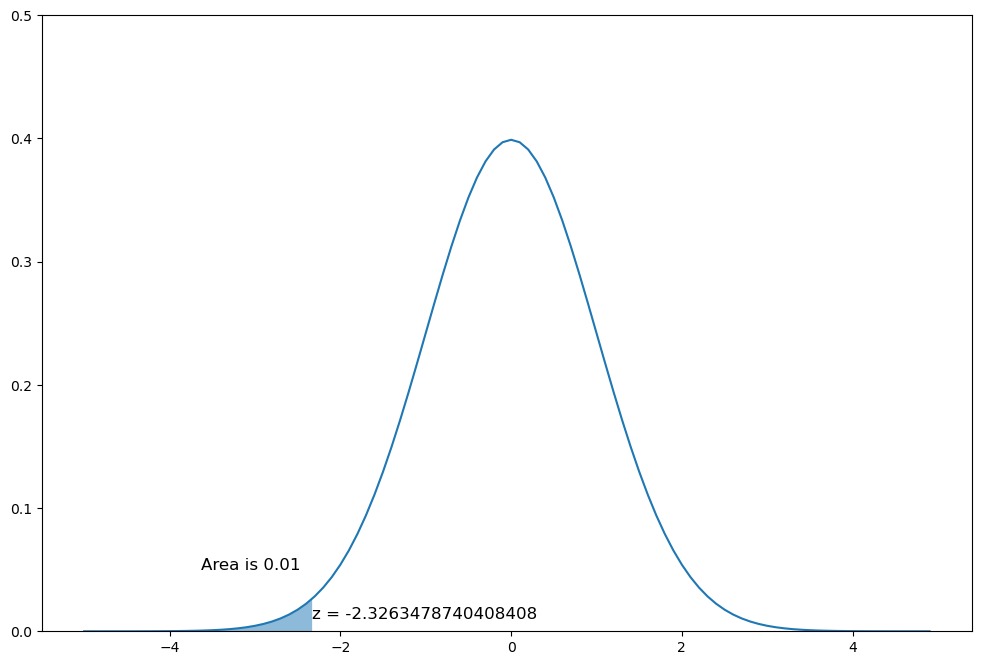

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution(z):
    # Plotting the normal distribution using the scipy stats norm function
    plt.figure(figsize=(12, 8))
    plt.ylim(0, 0.5)
    x = np.arange(-5, 5, 0.1)
    y1 = norm.pdf(x)
    plt.plot(x, y1)

    x2 = np.arange(-5, z, 0.01)  # We use this range from the -ve end to the specified z to compute the area
    sum_area = 0
    for i in x2:
        sum_area += norm.pdf(i) * 0.01  # Computing area under the graph from -5 to the specified z in steps of 0.01

    plt.annotate('Area is ' + str(round(sum_area, 3)), xy=(z - 1.3, 0.05), fontsize=12)
    plt.annotate('z = ' + str(z), xy=(z, 0.01), fontsize=12)
    plt.fill_between(x2, norm.pdf(x2), alpha=0.5)
    plt.show()

# Portfolio Information (replace with your portfolio data)
weights = np.array([0.4, 0.3, 0.3])  # Portfolio weights
mean_returns = np.array([0.08, 0.12, 0.15])  # Expected returns of the assets
volatility = np.array([0.1, 0.2, 0.3])  # Volatility (standard deviation) of the assets
cov_matrix = np.array([[0.01, 0.005, 0.002],
                       [0.005, 0.04, 0.01],
                       [0.002, 0.01, 0.09]])  # Covariance matrix of the assets

confidence_level = 0.99  # Confidence level for VaR (e.g., 99%)

# Portfolio Value
portfolio_value = 1000000  # Initial value of the portfolio

# Calculate Portfolio Mean Return
portfolio_mean_return = np.dot(weights, mean_returns)

# Calculate Portfolio Volatility
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Calculate Z-Score (Inverse of the cumulative standard normal distribution)
z_score = norm.ppf(1 - confidence_level)

# Calculate Parametric VaR
parametric_var = portfolio_value * (portfolio_mean_return - z_score * portfolio_volatility)

print(f"Parametric VaR at {confidence_level * 100:.2f}% confidence level is: ${parametric_var:.2f}")

# Plot the normal distribution and annotate the confidence interval
plot_normal_distribution(z_score)


### Historical VAR

In [160]:
import numpy as np

# Historical data of portfolio returns (replace with your own data)
portfolio_returns = np.array([-0.02, 0.03, -0.01, -0.05, 0.02, 0.01, -0.03, -0.02, -0.04, 0.01])

# Confidence level for VaR (e.g., 95%)
confidence_level = 0.95

# Portfolio Value
portfolio_value = 1000000  # Initial value of the portfolio

# Calculate Historical VaR
portfolio_returns_sorted = np.sort(portfolio_returns)
num_simulations = len(portfolio_returns_sorted)
confidence_level_index = int((1 - confidence_level) * num_simulations)
historical_var = -portfolio_value * portfolio_returns_sorted[confidence_level_index]

print(f"Historical VaR at {confidence_level * 100:.2f}% confidence level is: ${historical_var:.2f}")


Historical VaR at 95.00% confidence level is: $50000.00


In [80]:
pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, t
import matplotlib.pyplot as plt

In [161]:
# Import data
def getData(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix

# Portfolio Performance
def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns*weights)*Time
    std = np.sqrt( np.dot(weights.T, np.dot(covMatrix, weights)) ) * np.sqrt(Time)
    return returns, std

stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock+'.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)

[*********************100%***********************]  6 of 6 completed


## Var


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import timedelta
from datetime import datetime
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from scipy import stats
import seaborn as sns
import yfinance as yf
import math

In [ ]:
def getData(portfolio):
    df = pd.DataFrame()
    for stock in portfolio:
        s = yf.Ticker(stock)
        df[stock] = s.history(period='max')["Close"]
    return df

In [ ]:
def VaR(portfolio, weights, price, date = datetime.today()):
    '''
    Takes in the list of stocks in your portfolio, 
    '''
    df = getData(portfolio)
    df = df[-501:]
    df_exp =(df)/df.iloc[0]
    df_exp = df_exp*weights*price
    df['Value'] = df_exp.sum(axis = 1)
    df_loss = df.set_index(np.arange(0,501,1))
    for i in range(1,501):
        df_loss.iloc[i-1] = (df.iloc[i]/df.iloc[i-1])*df.iloc[-1]
    df_loss = df_loss[:-1]
    for i in range (500):
        df_loss['Value'].iloc[i]  = round(df_loss["Value"].iloc[i]-df["Value"].iloc[-1] , 2)
    arr = df_loss['Value'].values *-1
    arr = np.sort(arr)
    print("The 1 day 99 percent confidence VaR is: ",'{:2f}'.format(round(arr[4],2)*-1))
    print("The 10 day 99 percent confidence VaR is: ",'{:2f}'.format(round(arr[4],2)*math.sqrt(10)*-1))

In [ ]:
portfolio = ['AMZN']
weights = np.array([1])
price = 10000000
VaR(portfolio, weights, price)

In [ ]:
portfolio = ['FB', "AAPL", "AMZN", 'NFLX', 'GOOG']
weights = np.array([0.2,0.2,0.2,0.2,0.2])
start = '2013-01-01'
VaR(portfolio, weights, price)

# Quant py

In [131]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas_datareader import data as pdr
from scipy.stats import norm, t
import matplotlib.pyplot as plt

In [132]:
# Import data
def getData(stocks, start, end):
    stockData = pdr.get_data_yahoo(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns, meanReturns, covMatrix

# Portfolio Performance
def portfolioPerformance(weights, meanReturns, covMatrix, Time):
    returns = np.sum(meanReturns*weights)*Time
    std = np.sqrt( np.dot(weights.T, np.dot(covMatrix, weights)) ) * np.sqrt(Time)
    return returns, std

stockList = ['CBA', 'BHP', 'TLS', 'NAB', 'WBC', 'STO']
stocks = [stock+'.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=800)

returns, meanReturns, covMatrix = getData(stocks, start=startDate, end=endDate)
returns = returns.dropna()

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)

[*********************100%***********************]  6 of 6 completed


In [134]:
def historicalVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the percentile of the distribution at the given alpha confidence level
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

def historicalCVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the CVaR for dataframe / series
    """
    if isinstance(returns, pd.Series):
       
        belowVaR = returns <= historicalVaR(returns, alpha=alpha)

        return returns[belowVaR].mean()

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalCVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

# 100 days
Time = 100

hVaR = -historicalVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
hCVaR = -historicalCVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
pRet, pStd = portfolioPerformance(weights, meanReturns, covMatrix, Time)

InitialInvestment = 10000
print('Expected Portfolio Return:      ', round(InitialInvestment*pRet,2))
print('Value at Risk 95th CI    :      ', round(InitialInvestment*hVaR,2))
print('Conditional VaR 95th CI  :      ', round(InitialInvestment*hCVaR,2))

Expected Portfolio Return:       83.8
Value at Risk 95th CI    :       1815.71
Conditional VaR 95th CI  :       2416.68


In [135]:
def var_parametric(portofolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    # because the distribution is symmetric
    if distribution == 'normal':
        VaR = norm.ppf(1-alpha/100)*portfolioStd - portofolioReturns
    elif distribution == 't-distribution':
        nu = dof
        VaR = np.sqrt((nu-2)/nu) * t.ppf(1-alpha/100, nu) * portfolioStd - portofolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return VaR

def cvar_parametric(portofolioReturns, portfolioStd, distribution='normal', alpha=5, dof=6):
    if distribution == 'normal':
        CVaR = (alpha/100)**-1 * norm.pdf(norm.ppf(alpha/100))*portfolioStd - portofolioReturns
    elif distribution == 't-distribution':
        nu = dof
        xanu = t.ppf(alpha/100, nu)
        CVaR = -1/(alpha/100) * (1-nu)**(-1) * (nu-2+xanu**2) * t.pdf(xanu, nu) * portfolioStd - portofolioReturns
    else:
        raise TypeError("Expected distribution type 'normal'/'t-distribution'")
    return CVaR
#log returns are they necessary
#FX_DF_LogReturns = np.log(FX_DF/FX_DF.shift(1))
#FX_DF_LogReturns.hist(bins=20, range=(-0.05, 0.05), figsize=(10,10))
#plt.show()
normVaR = var_parametric(pRet, pStd)
normCVaR = cvar_parametric(pRet, pStd)

tVaR = var_parametric(pRet, pStd, distribution='t-distribution')
tCVaR = cvar_parametric(pRet, pStd, distribution='t-distribution')

print("Normal VaR 95th CI       :      ", round(InitialInvestment*normVaR,2))
print("Normal CVaR 95th CI      :      ", round(InitialInvestment*normCVaR,2))
print("t-dist VaR 95th CI       :      ", round(InitialInvestment*tVaR,2))
print("t-dist CVaR 95th CI      :      ", round(InitialInvestment*tCVaR,2))

Normal VaR 95th CI       :       1577.78
Normal CVaR 95th CI      :       1999.89
t-dist VaR 95th CI       :       1518.94
t-dist CVaR 95th CI      :       2094.3


In [136]:
#quantpy montecarlo
mc_sims = 10000 # number of simulations
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 245

for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio


In [137]:
def mcVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: percentile on return distribution to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)
    else:
        raise TypeError("Expected a pandas data series.")

def mcCVaR(returns, alpha=5):
    """ Input: pandas series of returns
        Output: CVaR or Expected Shortfall to a given confidence level alpha
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= mcVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()
    else:
        raise TypeError("Expected a pandas data series.")

In [138]:
portResults = pd.Series(portfolio_sims[-1,:])

VaR = initialPortfolio - mcVaR(portResults, alpha=5)
CVaR = initialPortfolio - mcCVaR(portResults, alpha=5)

print('VaR ${}'.format(round(VaR,2)))
print('CVaR ${}'.format(round(CVaR,2)))

VaR $36.69
CVaR $45.17


In [139]:
print("\nVaR:")

print(' historical VaR 95th CI   :      ', round(InitialInvestment*hVaR,2))
print(" Normal VaR 95th CI       :      ", round(InitialInvestment*normVaR,2))
print(" t-dist VaR 95th CI       :      ", round(InitialInvestment*tVaR,2))
print(" MC VaR  95th CI          :      ", round(VaR,2))


print("\nCVaR:")

print(' historical CVaR 95th CI  :      ', round(InitialInvestment*hCVaR,2))
print(" Normal CVaR 95th CI      :      ", round(InitialInvestment*normCVaR,2))
print(" t-dist CVaR 95th CI      :      ", round(InitialInvestment*tCVaR,2))
print(" MC CVaR 95th CI          :      ", round(CVaR,2))


VaR:
 historical VaR 95th CI   :       1815.71
 Normal VaR 95th CI       :       1577.78
 t-dist VaR 95th CI       :       1518.94
 MC VaR  95th CI          :       36.69

CVaR:
 historical CVaR 95th CI  :       2416.68
 Normal CVaR 95th CI      :       1999.89
 t-dist CVaR 95th CI      :       2094.3
 MC CVaR 95th CI          :       45.17


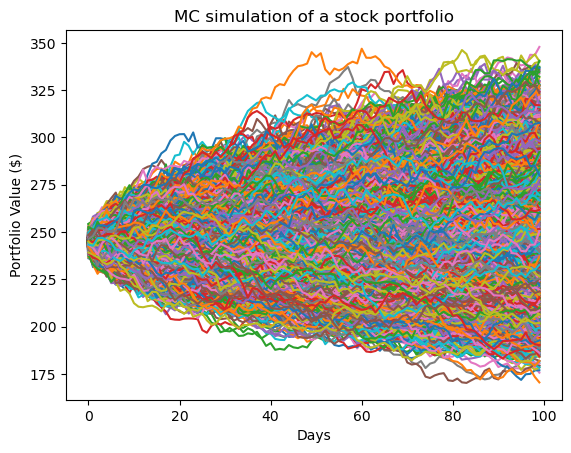

In [140]:
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()

The 5.0% VaR for the portfolio is: -0.02


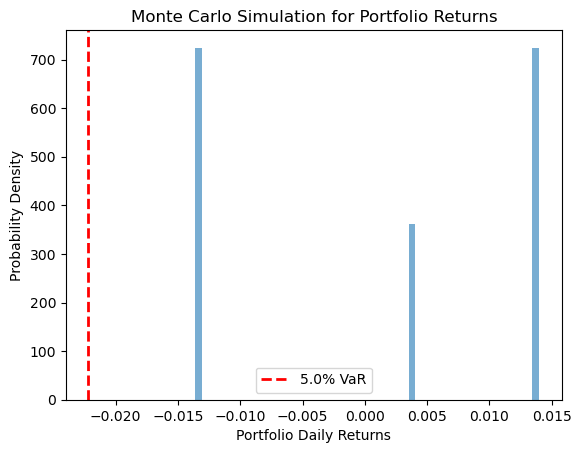

In [156]:
#monte carlo var chat gpt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate daily portfolio returns
def portfolio_returns(weights, returns):
    return np.dot(returns, weights)

# Function to calculate VaR using Monte Carlo simulation
def monte_carlo_var(returns, weights, alpha=0.05, num_simulations=10000):
    portfolio_mean = np.mean(portfolio_returns(weights, returns))
    portfolio_cov = np.cov(returns, rowvar=False)
    num_assets = len(returns[0])

    portfolio_returns_simulations = np.zeros(num_simulations)
    for i in range(num_simulations):
        random_returns = np.random.multivariate_normal(mean=np.zeros(num_assets), cov=portfolio_cov, size=len(returns))
        portfolio_returns_simulations[i] = np.dot(weights, random_returns[-1])

    sorted_returns = np.sort(portfolio_returns_simulations)
    var_index = int(num_simulations * alpha)
    var = sorted_returns[var_index]
    return var

# Sample historical daily stock price data (replace this with your own data)
# Each column represents a different stock, and each row represents a daily price
stock_prices = pd.DataFrame({
    'Stock1': [100, 101, 102, 100, 99, 98],
    'Stock2': [50, 51, 52, 54, 53, 52],
})

# Calculate daily returns from the historical prices
returns = stock_prices.pct_change().dropna().values

# Sample portfolio weights (replace this with your own weights)
# Make sure the weights sum up to 1
portfolio_weights = np.array([0.6, 0.4])

# Calculate VaR using Monte Carlo simulation
alpha = 0.05
num_simulations = 10000
var = monte_carlo_var(returns, portfolio_weights, alpha=alpha, num_simulations=num_simulations)

# Print the VaR result
print(f"The {alpha*100}% VaR for the portfolio is: {var:.2f}")

# Plot the histogram of simulated portfolio returns
plt.hist(portfolio_returns(portfolio_weights, returns), bins=50, density=True, alpha=0.6)
plt.axvline(var, color='red', linestyle='dashed', linewidth=2, label=f'{alpha*100}% VaR')
plt.xlabel('Portfolio Daily Returns')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Monte Carlo Simulation for Portfolio Returns')
plt.show()
